In [34]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Import the complaints.csv file created after cleaning the data
complaints = pd.read_csv("complaints.csv", index_col=0)
complaints.head()

,Address_precinct,Hood,Complaint_date,Complaint_time,Key_code,Offense_level,Offense_desc,Suspect_age,Suspect_race,Suspect_sex,Victim_age,Victim_race,Victim_sex,Latitude,Longitude,Lat_Lon
0,48.0,BRONX,2019-06-25 00:00:00,2019-07-28 14:15:00,578,VIOLATION,HARRASSMENT 2,UNKNOWN,BLACK,M,25-44,BLACK,F,40.853355,-73.881668,"(40.85335545600003, -73.88166837799997)"
1,14.0,MANHATTAN,2019-06-25 00:00:00,2019-07-28 13:55:00,341,MISDEMEANOR,PETIT LARCENY,45-64,BLACK,M,UNKNOWN,UNKNOWN,D,40.750431,-73.989282,"(40.75043076800005, -73.98928217599996)"
2,18.0,MANHATTAN,2019-06-25 00:00:00,2019-07-28 13:20:00,344,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,NaN,NaN,NaN,45-64,WHITE,M,40.761677,-73.974917,"(40.761676504000036, -73.97491700299997)"
3,52.0,BRONX,2019-06-25 00:00:00,2019-07-28 13:20:00,104,FELONY,RAPE,45-64,BLACK HISPANIC,M,25-44,WHITE HISPANIC,F,40.869059,-73.879630,"(40.86905853200005, -73.87963014799993)"
4,19.0,MANHATTAN,2019-06-25 00:00:00,2019-07-28 13:20:00,578,VIOLATION,HARRASSMENT 2,25-44,BLACK,M,45-64,BLACK,M,40.783426,-73.949163,"(40.78342557000008, -73.94916258199999)"


In [20]:
# Check the composition of the Hood column
complaints.Hood.unique()

array(['BRONX', 'MANHATTAN', 'BROOKLYN', 'QUEENS', 'STATEN ISLAND', nan],
      dtype=object)

In [21]:
# Create a complaints_hood dataframe where the NaN's in Hood column are removed
complaints_hood = complaints.dropna(subset=["Hood"])

In [45]:
complaints_hood.head()

,Address_precinct,Hood,Complaint_date,Complaint_time,Key_code,Offense_level,Offense_desc,Suspect_age,Suspect_race,Suspect_sex,Victim_age,Victim_race,Victim_sex,Latitude,Longitude,Lat_Lon
0,48.0,BRONX,2019-06-25 00:00:00,2019-07-28 14:15:00,578,VIOLATION,HARRASSMENT 2,UNKNOWN,BLACK,M,25-44,BLACK,F,40.853355,-73.881668,"(40.85335545600003, -73.88166837799997)"
1,14.0,MANHATTAN,2019-06-25 00:00:00,2019-07-28 13:55:00,341,MISDEMEANOR,PETIT LARCENY,45-64,BLACK,M,UNKNOWN,UNKNOWN,D,40.750431,-73.989282,"(40.75043076800005, -73.98928217599996)"
2,18.0,MANHATTAN,2019-06-25 00:00:00,2019-07-28 13:20:00,344,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,NaN,NaN,NaN,45-64,WHITE,M,40.761677,-73.974917,"(40.761676504000036, -73.97491700299997)"
3,52.0,BRONX,2019-06-25 00:00:00,2019-07-28 13:20:00,104,FELONY,RAPE,45-64,BLACK HISPANIC,M,25-44,WHITE HISPANIC,F,40.869059,-73.879630,"(40.86905853200005, -73.87963014799993)"
4,19.0,MANHATTAN,2019-06-25 00:00:00,2019-07-28 13:20:00,578,VIOLATION,HARRASSMENT 2,25-44,BLACK,M,45-64,BLACK,M,40.783426,-73.949163,"(40.78342557000008, -73.94916258199999)"


In [23]:
# Check it's been removed
complaints_hood.Hood.unique()

array(['BRONX', 'MANHATTAN', 'BROOKLYN', 'QUEENS', 'STATEN ISLAND'],
      dtype=object)

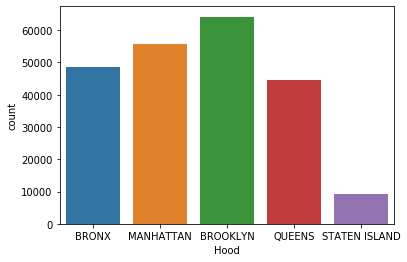

In [41]:
# Find out the distribution of complaints by neighbourhood
sns.countplot(complaints_hood['Hood'])

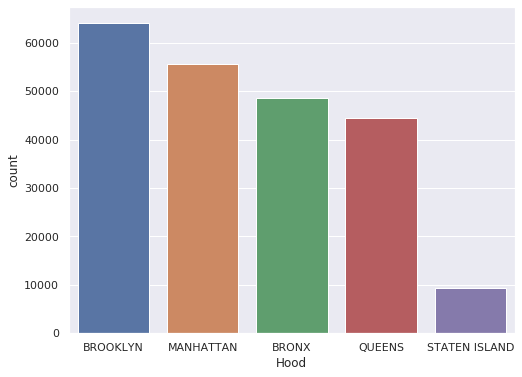

In [67]:
# Order the plot in descending order and set the figure size
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(complaints_hood['Hood'], order=complaints_hood['Hood'].value_counts().index)

In [51]:
# Let's drop the E and D from Victim_sex that correspond to Unkown victim information
complaints_vict_sex = complaints[~complaints.Victim_sex.str.contains("E|D")]

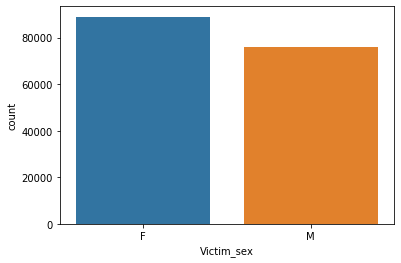

In [52]:
# Find out the distribution of complaints by victim sex
sns.countplot(complaints_vict_sex['Victim_sex'])

In [62]:
# Let's drop the Unknown info from Victim_race
complaints_vict_race = complaints[~complaints.Victim_race.str.contains("UNKNOWN")]

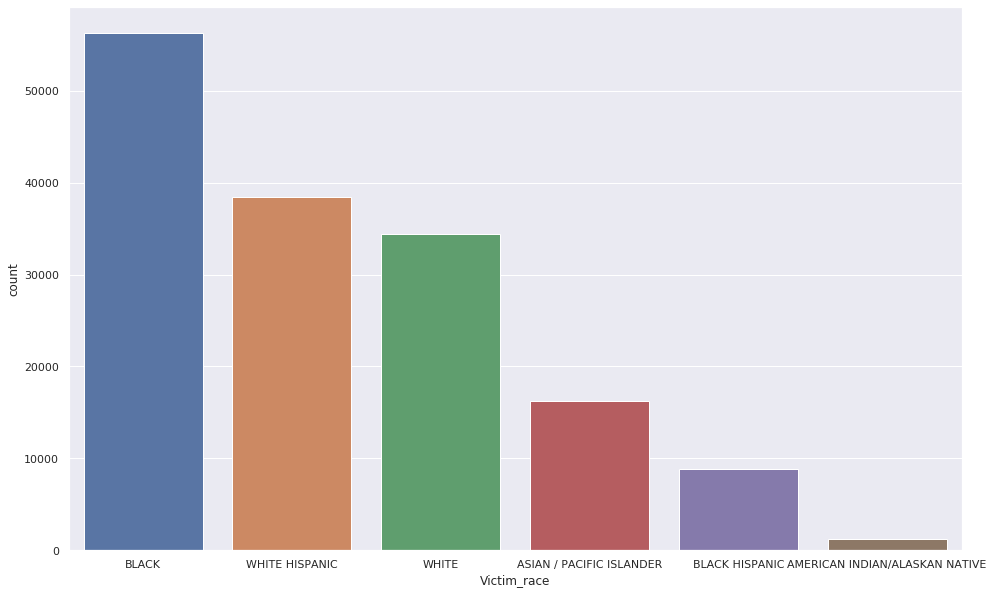

In [68]:
# Find out the distribution of complaints by victim race
# Is this the right result as we've been removing many UNKNOWNS => Standard deviation??
sns.set(rc={'figure.figsize':(16,10)})
sns.countplot(complaints_vict_race['Victim_race'], order=complaints_vict_race['Victim_race'].value_counts().index)

In [53]:
complaints.Victim_race.unique()

array(['BLACK', 'UNKNOWN', 'WHITE', 'WHITE HISPANIC', 'BLACK HISPANIC',
       'ASIAN / PACIFIC ISLANDER', 'AMERICAN INDIAN/ALASKAN NATIVE'],
      dtype=object)

In [32]:
complaints.Offense_desc.unique()

array(['HARRASSMENT 2', 'PETIT LARCENY', 'ASSAULT 3 & RELATED OFFENSES',
       'RAPE', 'VEHICLE AND TRAFFIC LAWS', 'ROBBERY', 'THEFT-FRAUD',
       'BURGLARY', 'OFFENSES AGAINST PUBLIC ADMINI', 'DANGEROUS WEAPONS',
       'GRAND LARCENY', 'CRIMINAL MISCHIEF & RELATED OF',
       'FELONY ASSAULT', 'SEX CRIMES', 'FORGERY', 'CRIMINAL TRESPASS',
       'FRAUDS', 'POSSESSION OF STOLEN PROPERTY', 'DANGEROUS DRUGS',
       'GRAND LARCENY OF MOTOR VEHICLE', 'MISCELLANEOUS PENAL LAW',
       'OFF. AGNST PUB ORD SENSBLTY &', 'UNAUTHORIZED USE OF A VEHICLE',
       'MURDER & NON-NEGL. MANSLAUGHTER', "BURGLAR'S TOOLS",
       'OFFENSES INVOLVING FRAUD', 'OFFENSES AGAINST THE PERSON',
       'OTHER OFFENSES RELATED TO THEF', 'INTOXICATED & IMPAIRED DRIVING',
       'FELONY SEX CRIMES', 'ADMINISTRATIVE CODE', 'ESCAPE 3',
       'NYS LAWS-UNCLASSIFIED VIOLATION', 'ARSON',
       'ALCOHOLIC BEVERAGE CONTROL LAW', 'GAMBLING', 'THEFT OF SERVICES',
       'OTHER STATE LAWS (NON PENAL LA', 'NYS LAWS-UNCL

In [33]:
complaints["Offense_desc"].value_counts()

PETIT LARCENY                           41039
HARRASSMENT 2                           35048
ASSAULT 3 & RELATED OFFENSES            26246
CRIMINAL MISCHIEF & RELATED OF          22801
GRAND LARCENY                           19823
OFF. AGNST PUB ORD SENSBLTY &           10099
FELONY ASSAULT                           9800
MISCELLANEOUS PENAL LAW                  7085
DANGEROUS DRUGS                          6568
ROBBERY                                  5824
BURGLARY                                 4824
OFFENSES AGAINST PUBLIC ADMINI           3796
SEX CRIMES                               3769
DANGEROUS WEAPONS                        3669
VEHICLE AND TRAFFIC LAWS                 3212
FORGERY                                  2703
INTOXICATED & IMPAIRED DRIVING           2350
GRAND LARCENY OF MOTOR VEHICLE           2157
THEFT-FRAUD                              1992
CRIMINAL TRESPASS                        1646
FRAUDS                                   1229
RAPE                              